# Introduction

Here we fit a multinomial logistic regression with L1 penalty on a subset of the MNIST digits classification task. We use the SAGA algorithm for this purpose: this a solver that is fast when the number of samples is significantly larger than the number of features and is able to finely optimize non-smooth objective functions which is the case with the l1-penalty. Test accuracy reaches > 0.8, while weight vectors remains sparse and therefore more easily interpretable.

Note that this accuracy of this l1-penalized linear model is significantly below what can be reached by an l2-penalized linear model or a non-linear multi-layer perceptron model on this dataset.

# Import Libraries

We will start by importing the necessary libraries for this lab. We will use scikit-learn library to fetch the dataset, train the model, and evaluate the performance of the model.

In [4]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load the MNIST dataset

We will load the MNIST dataset using the **fetch_openml** function from scikit-learn. We will also select a subset of the data by setting the number of **train_samples** to 5000.

In [5]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Preprocessing

We will preprocess the data by shuffling the data, splitting the dataset into training and testing sets, and scaling the data using **StandardScaler**

In [6]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Model

We will train the model using logistic regression with L1 penalty and SAGA algorithm. We will set the value of **C** to 50.0 divided by the number of training samples

In [7]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)

# Evaluate the Model

We will evaluate the performance of the model by calculating the sparsity and the accuracy score.

In [8]:
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 75.41%
Test score with L1 penalty: 0.8286


# Visualize the Model

We will visualize the model by plotting the classification vectors for each class.

Example run in 453.384 s


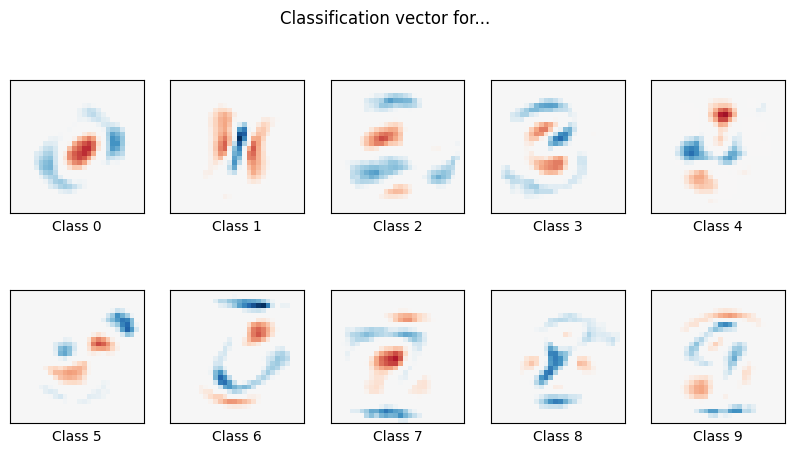

In [9]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

# Summary

In this lab, we learned how to use logistic regression to classify hand-written digits from the MNIST dataset. We also learned how to use the SAGA algorithm with L1 penalty for logistic regression. We achieved an accuracy score of over 0.8 with a sparse weight vector, making the model more interpretable. However, we also noted that this accuracy is significantly below what can be reached by an L2-penalized linear model or a non-linear multi-layer perceptron model on this dataset.